In [ ]:
import os
import subprocess

def git_repo_root():
    # Run the 'git rev-parse --show-toplevel' command to get the root directory of the Git repository
    try:
        root = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], universal_newlines=True).strip()
        return root
    except subprocess.CalledProcessError:
        # Handle the case where the current directory is not inside a Git repository
        return None

# Get the root directory of the Git repository
git_root = git_repo_root()

if git_root:
    # Change the working directory to the root of the Git repository
    os.chdir(git_root)
    print(f"Changed working directory to: {git_root}")
else:
    print("Not inside a Git repository.")

In [2]:
import torch
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from diffusion import VPSDE
from torch.utils.data import DataLoader
from training import train_score_network_mnist

In [5]:
tfm = transforms.Compose([transforms.ToTensor(), transforms.Pad(2)])
data_x = torchvision.datasets.MNIST(f'./data/', transform=tfm, download = True)
data_x = torchvision.datasets.EMNIST( f'./data/', 'letters', transform=tfm, download = True)

100%|██████████| 561753746/561753746 [02:18<00:00, 4053423.45it/s] 


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


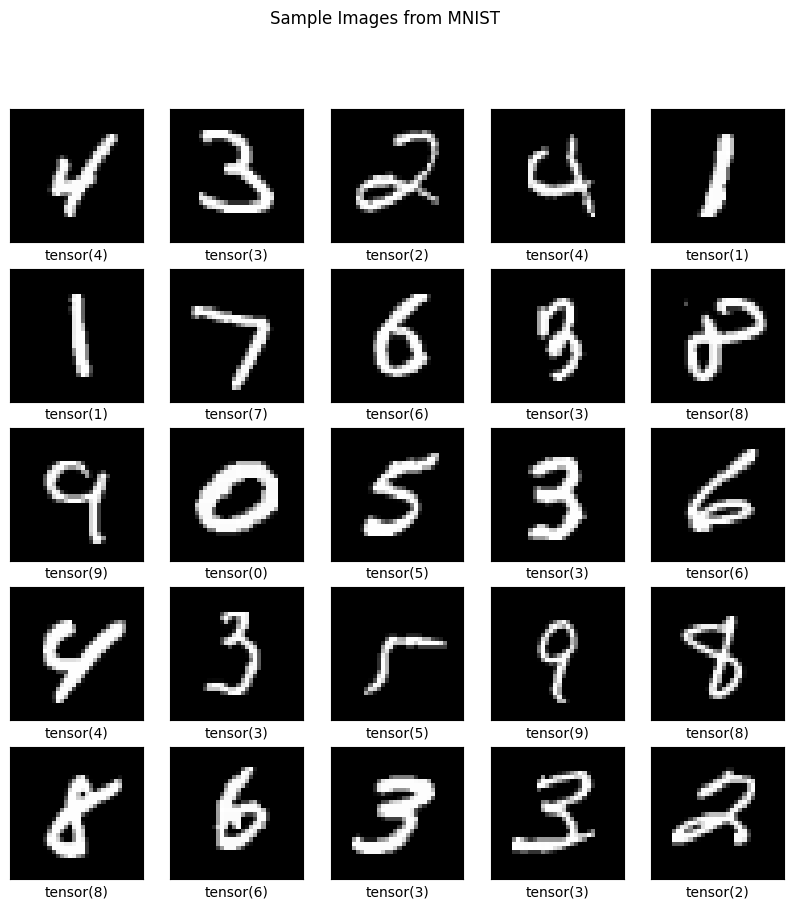

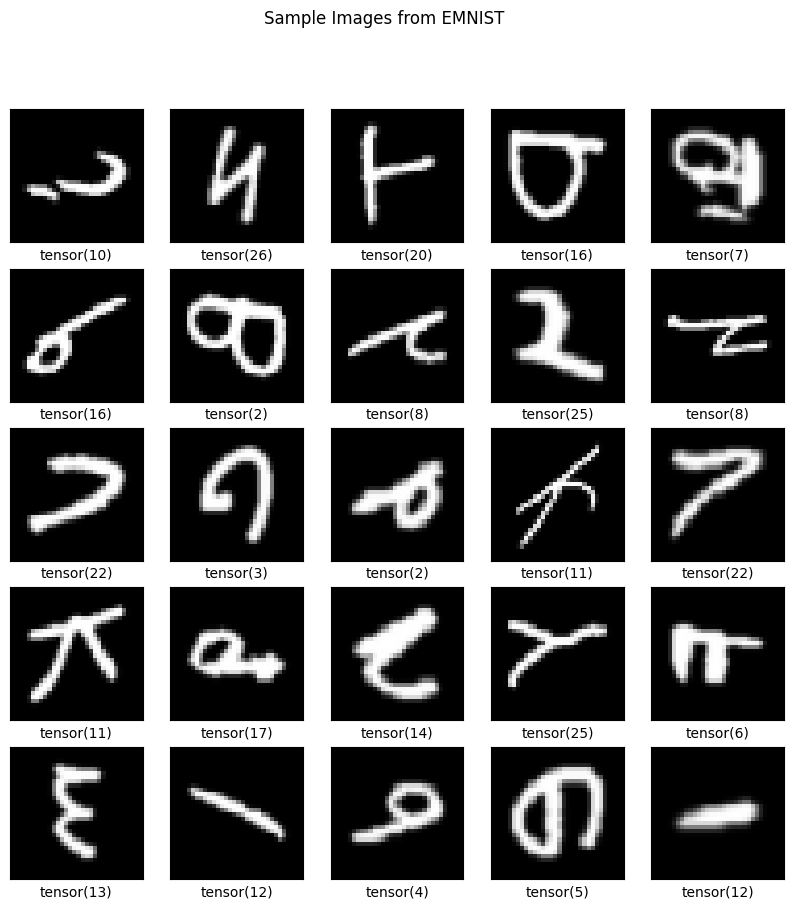

In [7]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Transform: Convert images to tensor and pad
tfm = transforms.Compose([transforms.ToTensor(), transforms.Pad(2)])

# Load MNIST dataset
mnist_data = torchvision.datasets.MNIST('./data/', transform=tfm, download=True)
mnist_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

# Load EMNIST dataset
emnist_data = torchvision.datasets.EMNIST('./data/', 'letters', transform=tfm, download=True)
emnist_loader = torch.utils.data.DataLoader(emnist_data, batch_size=64, shuffle=True)

# Function to visualize images
def show_images(images, labels, dataset_name):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.xlabel(labels[i])
    plt.suptitle(f'Sample Images from {dataset_name}')
    plt.show()

# Visualize some MNIST images
mnist_images, mnist_labels = next(iter(mnist_loader))
show_images(mnist_images, mnist_labels, 'MNIST')

# Visualize some EMNIST images
emnist_images, emnist_labels = next(iter(emnist_loader))
show_images(emnist_images, emnist_labels, 'EMNIST')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


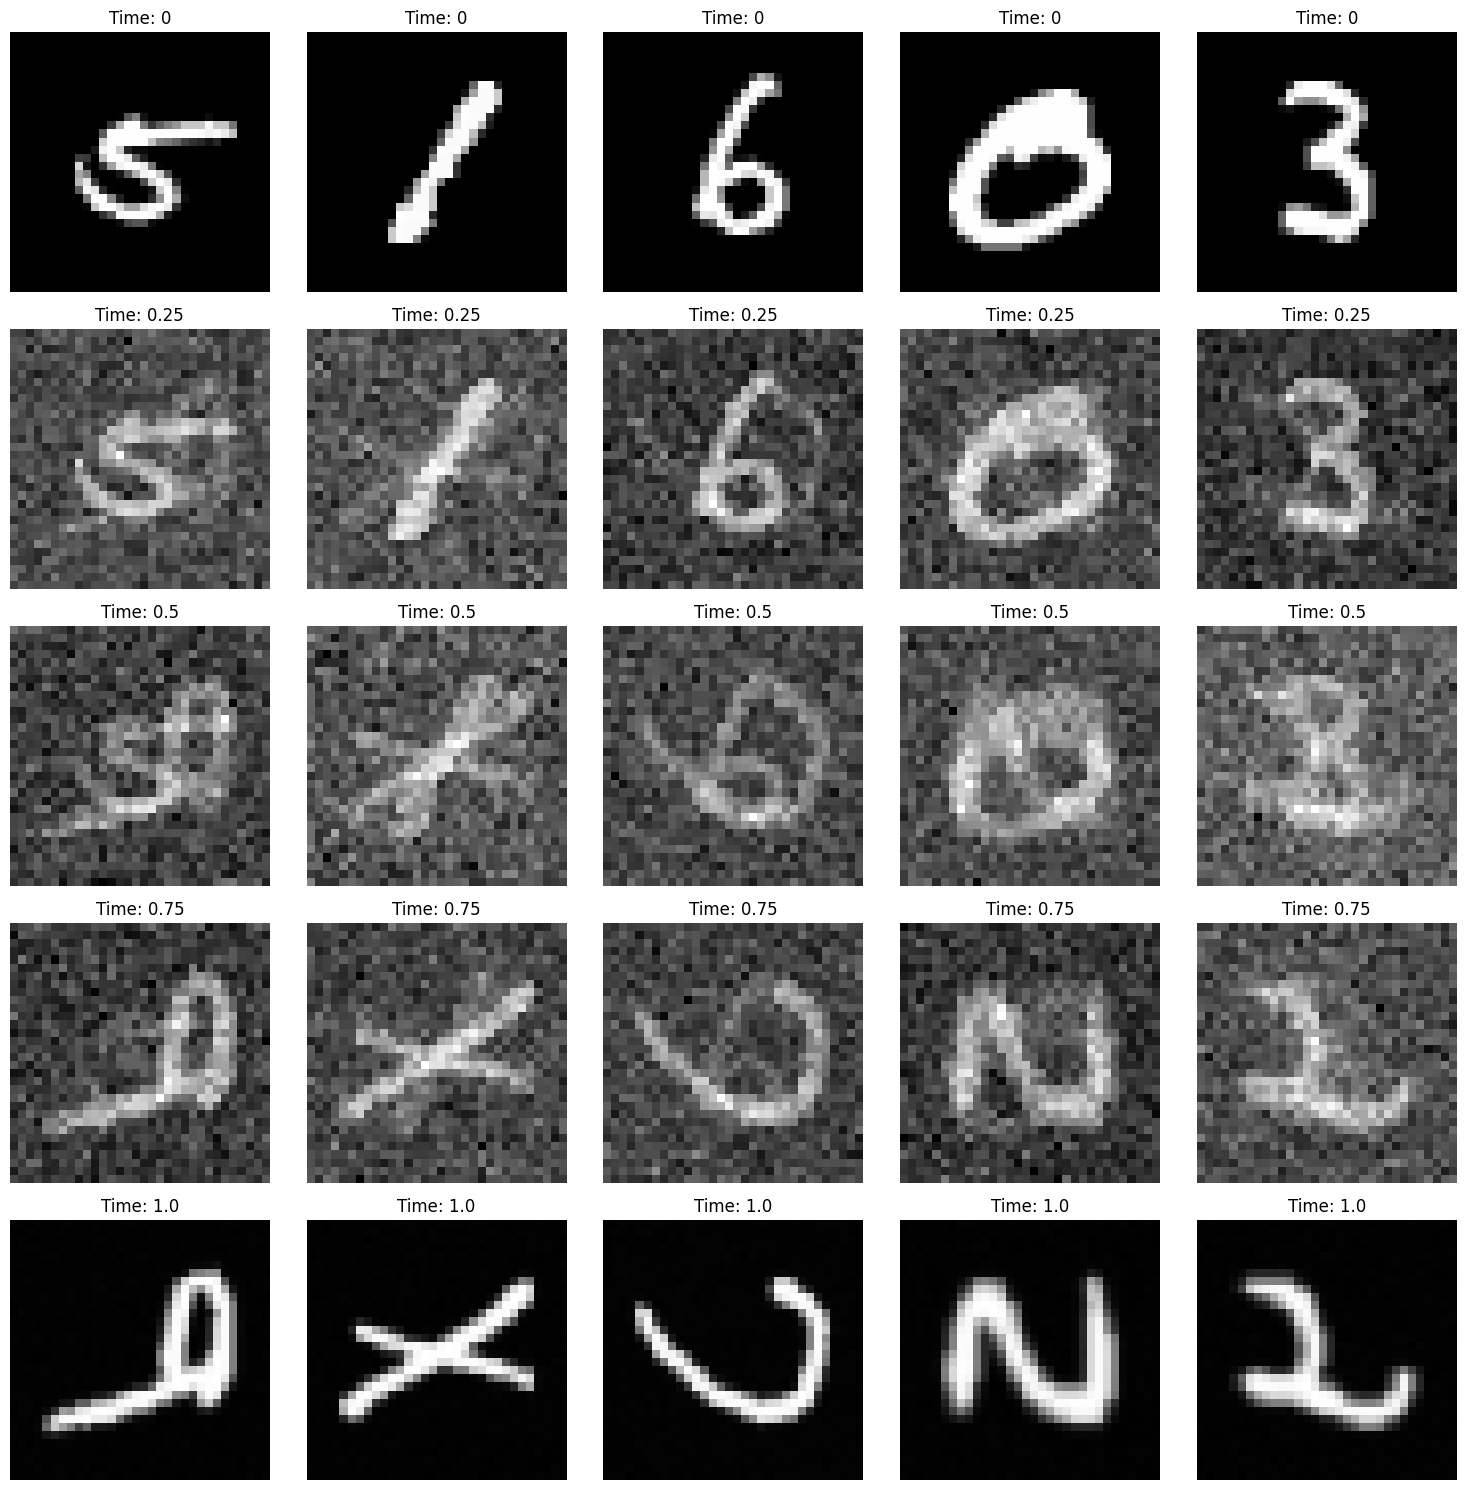

In [38]:
%load_ext autoreload
%autoreload 2

import torch
from diffusion import BridgeDiffusionVPSDE

def apply_diffusion(x, y, sde, time_steps):
    """
    Applies diffusion to a batch of images x for a given set of time steps.
    x: input images (MNIST)
    y: target images (EMNIST)
    sde: instance of your SDE class
    time_steps: array of time steps at which to visualize the diffusion
    """
    diffused_images = []
    for t in time_steps:
        mu, std = sde.marginal(x, torch.tensor([t]), y)
        # Apply the diffusion (adding Gaussian noise)
        noisy_x = mu + std * torch.randn_like(x)
        diffused_images.append(noisy_x)
    return diffused_images

def show_diffused_images(diffused_images, time_steps):
    """
    Visualizes diffused images at different time steps.
    diffused_images: list of tensors containing diffused images at each time step
    time_steps: corresponding time steps
    """
    num_steps = len(time_steps)
    fig, axes = plt.subplots(nrows=num_steps, ncols=5, figsize=(15, 3 * num_steps))
    for i in range(num_steps):
        for j in range(5):
            ax = axes[i, j]
            ax.imshow(diffused_images[i][j].detach().numpy().squeeze(), cmap='gray')
            ax.set_title(f"Time: {time_steps[i]}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()

mnist_loader = torch.utils.data.DataLoader(mnist_data, batch_size=5, shuffle=True)

emnist_loader = torch.utils.data.DataLoader(emnist_data, batch_size=5, shuffle=True)

def sample():
    x, y = next(iter(emnist_loader))
    return x

# Visualize some MNIST images
mnist_images, mnist_labels = next(iter(mnist_loader))
mnist_images2, mnist_labels2 = next(iter(mnist_loader))


# Visualize some EMNIST images
emnist_images, emnist_labels = next(iter(emnist_loader))



    
# Example usage
sde_instance = BridgeDiffusionVPSDE(sample, bmin= .1, bmax=.1)  # Initialize your SDE class
time_steps = [0, 0.25, 0.5, 0.75, 1.0]  # Example time steps

# Assuming mnist_images and emnist_images are batches from your DataLoader
diffused_images = apply_diffusion(mnist_images, emnist_images, sde_instance, time_steps)
show_diffused_images(diffused_images, time_steps)
